# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [10]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [11]:
def basic_info(df):
    print("Shape of data:", df.shape, "\n")
    print("Data Info:", df.info())
          
basic_info(df)

Shape of data: (2240, 27) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPu

- There are around 2.2k rows of data and 27 columns.
- We can observe that most of the columns are numerical datatype.

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [14]:
def percent_missing_values(df):
    print("Percentage of missing values in every column:\n", df.isnull().sum()/len(df)*100)

percent_missing_values(df)

Percentage of missing values in every column:
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


- Income has missing values of approx 1%

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [17]:
df['Income'].skew()

6.763487372811116

- Income has High Standard Deviation (like 25173.08): Indicates significant variability in the data, suggesting potential outliers.
- If the income data is skewed than the median is usually a better choice because it is not influenced by outliers.

In [19]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [20]:
df['Income'].isnull().sum()

0

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [22]:
df.duplicated().sum()

0

- There is no duplicate records in the dataset 

### 5. Drop the columns which you think redundant for the analysis 

In [25]:
df = df.drop(columns =['ID', 'Dt_Customer'], axis=1)

- Column 'ID' and 'Dt_Customer' is redundant. It doesn't help me analysis 

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [28]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

- There are 8 unique values in Marital Status. Single, Together, Married, Divorced, Widow, YOLO, Alone and Absurd

In [30]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [31]:
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [33]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [35]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] 

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [37]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [39]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [41]:
df = df.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,Relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,Relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,Relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [43]:
df['age'] = 2024 - df['Year_Birth']

In [44]:
df = df.drop('Year_Birth', axis = 1)

In [45]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,43


In [46]:
dfc = df.copy()

- Keep a copy of the cleaned dataset (we will use it to assign the cluster labels and will analyze the clusters formed)

### 13. Encode the categorical variables in the dataset

In [49]:
le = LabelEncoder()
categ = ['Education', 'Marital_Status']
for i in categ:
    df[i] = df[[i]].apply(le.fit_transform)

In [50]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,2,1,58138.0,58,7,0,1617,25,0,1,67
1,2,1,46344.0,38,5,0,27,6,2,0,70
2,2,0,71613.0,26,4,0,776,21,0,0,59
3,2,0,26646.0,26,6,0,53,8,1,0,40
4,4,0,58293.0,94,5,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [52]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [53]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.350141,1.346874,0.235696,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,1.346874,-0.235454,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,-0.742460,0.773999,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,-0.742460,-1.022355,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,-0.742460,0.241888,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


In [54]:
scaled_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Marital_Status       2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   NumWebVisitsMonth    2240 non-null   float64
 5   Complain             2240 non-null   float64
 6   Total_Expenses       2240 non-null   float64
 7   Num_Total_Purchases  2240 non-null   float64
 8   Kids                 2240 non-null   float64
 9   TotalAcceptedCmp     2240 non-null   float64
 10  age                  2240 non-null   float64
dtypes: float64(11)
memory usage: 192.6 KB


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [56]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663,  0.01375403,  0.12003272, -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.01375403,  1.00044663, -0.00468593,  0.00450972, -0.00344176,
         0.00520466,  0.01775232, -0.00671037, -0.03917598,  0.06004206,
         0.0042384 ],
       [ 0.12003272, -0.00468593,  1.00044663, -0.0040626 , -0.55003054,
        -0.02719904,  0.66507176,  0.56370172, -0.29098745,  0.28723724,
         0.16097107],
       [-0.01173369,  0.00450972, -0.0040626 ,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882, -0.00344176, -0.55003054, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252,  0.00520466, -0.02719904,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [57]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [3.1904976  0.15898427 0.33405275 1.2576053  0.57467313 0.70088133
 0.8148781  0.88268049 1.07559424 0.99819893 1.01686678]


eigein vectors 
 [[-8.10840602e-02 -1.28350259e-02  2.36686503e-02  5.51297088e-01
   9.44079917e-02  1.09399823e-01  6.91176145e-01 -2.13936354e-01
   3.53448105e-01  1.33251310e-01  4.14253698e-02]
 [-1.65906490e-02  5.37729948e-04 -2.73537172e-03 -7.24644501e-02
  -9.30748009e-03  1.59677373e-01 -9.75268782e-02  2.48019835e-01
   2.93280626e-01  5.20531449e-01 -7.35452612e-01]
 [-4.53903415e-01 -1.10154101e-01 -7.33770178e-01  1.11579420e-01
  -4.00829608e-01  2.33759772e-01 -3.55280357e-02  8.22772957e-02
  -7.11591328e-02 -3.28890469e-02  3.85228536e-02]
 [ 4.88801362e-03 -3.74741918e-02 -1.77808800e-02  1.12911590e-01
  -4.88512292e-02 -1.39140776e-01  2.76281232e-02 -4.78105566e-01
  -6.57509247e-01  5.43269886e-01 -8.33737576e-02]
 [ 3.78637324e-01  9.89967067e-02 -5.23086432e-01  3.88610332e-02
   4.48301055e-01  8.26478962e-02 -2.9488668

In [58]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [28.991575143457833, 11.427671513170493, 9.773764190197202, 9.240116561433675, 9.070484567401639, 8.020785766248613, 7.40467557484764, 6.3688039615094825, 5.221968893580293, 3.035487484221481, 1.4446663439316518]
Cummulative Variance Explained:  [ 28.99157514  40.41924666  50.19301085  59.43312741  68.50361198
  76.52439774  83.92907332  90.29787728  95.51984617  98.55533366
 100.        ]


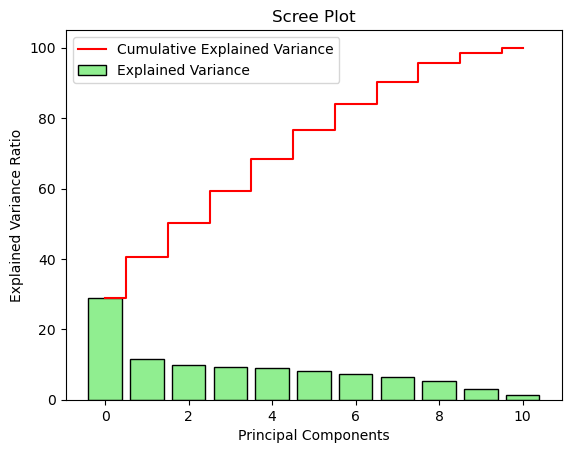

In [59]:
# Scree plot
plt.bar(range(len(var_exp)), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- We can observe from the above scree plot the first 8 principal components are explaining the about 90-95% of the variation, So we can choose optimal number of principal components as 8.

In [61]:
pca = PCA(n_components= 8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [63]:
clusters_errors = []
clusters_range = range(2, 15)
for num_clusters in clusters_range:
    clusters = KMeans(num_clusters, random_state= 100)
    clusters.fit(pca_df)
    clusters_errors.append(clusters.inertia_)

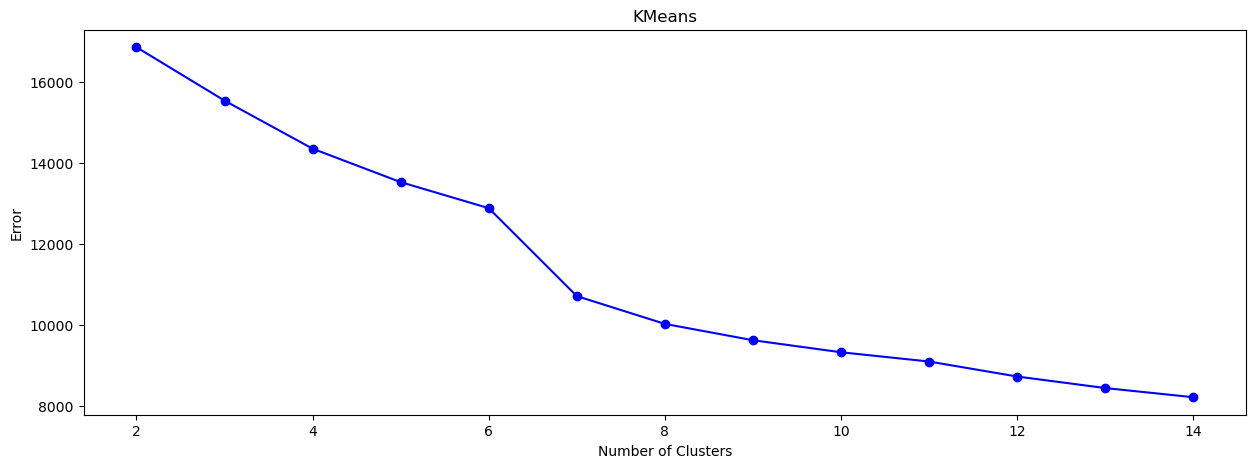

In [64]:
cluster_df = pd.DataFrame({'num_clusters': clusters_range, 'cluster_errors':clusters_errors})


## Elbow plot.
plt.figure(figsize=(15, 5))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()


- From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3.

In [66]:
kmeans = KMeans(n_clusters= 3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [67]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [68]:
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.957055,-0.081739,-0.344512,1.193882,-0.696833,-0.299017,-1.145161,-0.357545,1
1,-1.512469,1.000600,-0.367141,1.007044,-0.444544,1.371957,-0.724419,-0.346326,0
2,1.314744,-0.299369,0.296387,-0.765120,0.732714,0.984409,0.025308,0.058777,1
3,-1.754887,-1.139787,-0.254573,-0.825218,0.579116,0.221944,0.562441,0.239502,2
4,0.063732,0.571385,0.902276,-0.757431,-0.795115,-1.241512,1.325684,0.898414,0


In [69]:
kmeans_df['Label'].value_counts()

Label
2    795
0    753
1    692
Name: count, dtype: int64

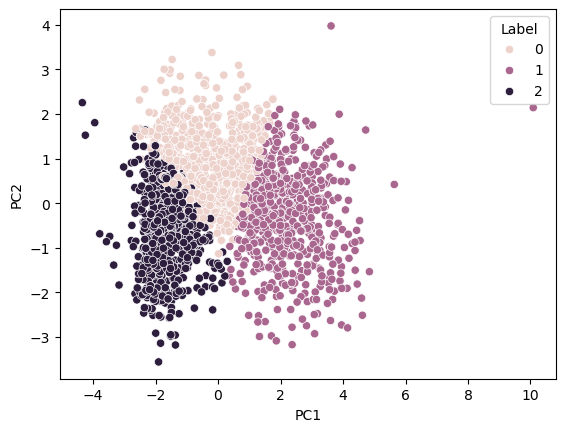

In [70]:
sns.scatterplot(data = kmeans_df, hue= 'Label', x='PC1', y='PC2')
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

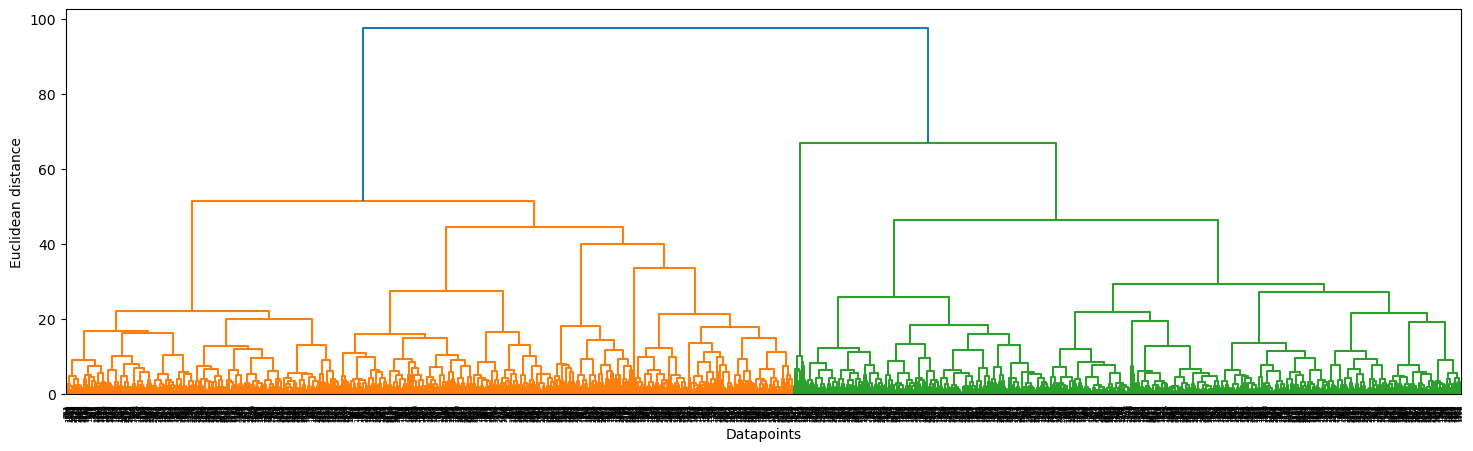

In [72]:
plt.figure(figsize=(18, 5))
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
for i in range(2, 15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))

2 0.19084804869287447
3 0.19859958241705142
4 0.11246117002824908
5 0.11424998800538333
6 0.13182229011125113
7 0.13957493415196673
8 0.1390756505298205
9 0.11337550304845266
10 0.1119262030658049
11 0.10382539581019268
12 0.10893573525823932
13 0.10234785589811332
14 0.09550766042026601


- We can observe from the above dendrogram and as well as the silhoutte scores for different clusters, The highest silhoutte score is for clusters 3.
- Lets choose K=3 as the optimal cluster size and build a agglomerative clustering model using the original scaled dataset.

In [76]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward',)
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [77]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [78]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,Relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,Relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,Relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

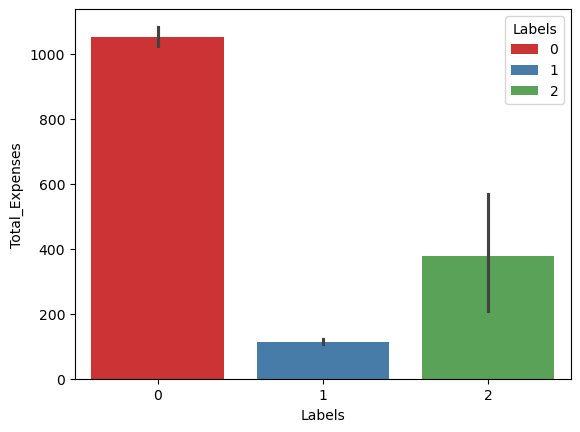

In [80]:
sns.barplot(data = df_hier, x = 'Labels', y='Total_Expenses', hue='Labels', palette='Set1')
plt.show()

- The Total_Expenses is much higher for cluster 0 compared to the clusters 1 and 2.

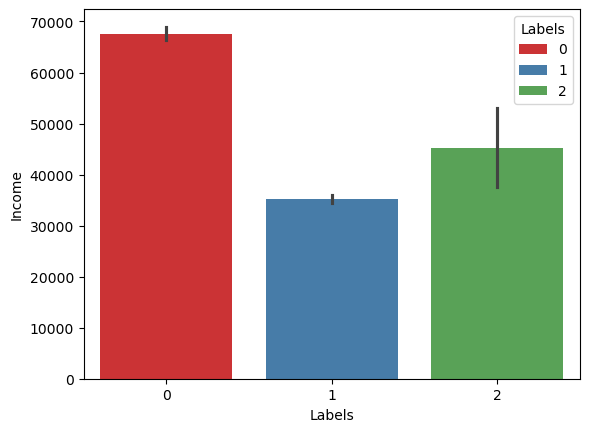

In [82]:
sns.barplot(data = df_hier, x = 'Labels', y = 'Income', hue='Labels', palette='Set1')
plt.show()

- Where as the Income is also higher for the cluster 0 followed by cluster 2.

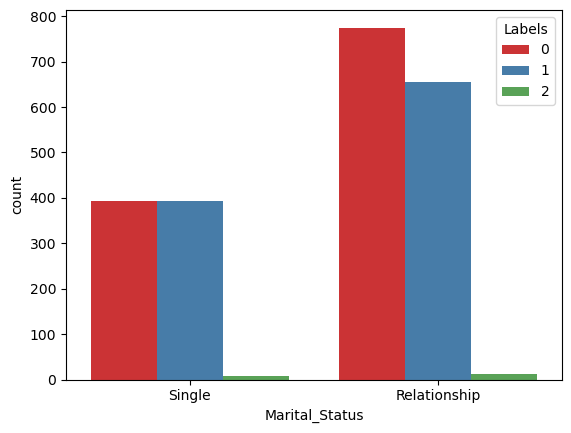

In [84]:
sns.countplot(x= 'Marital_Status',hue='Labels',data=df_hier, palette='Set1')
plt.show()

- We can observe that the most of the customers who are in a relationship falls under cluster 0.

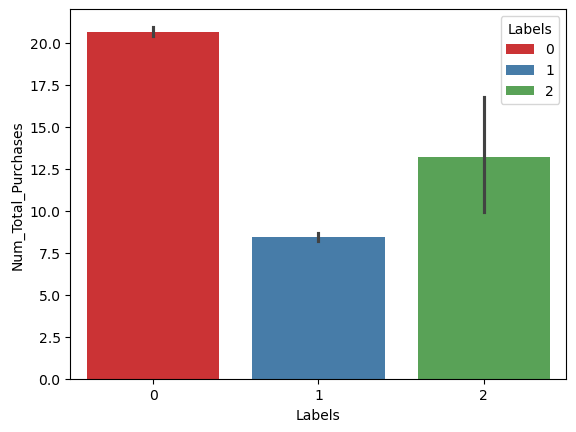

In [86]:
sns.barplot(data = df_hier, x = 'Labels', y = 'Num_Total_Purchases', hue='Labels', palette='Set1')
plt.show()

- The Total number of purchases is also much higher for customers from cluster 0 compared to cluster 1 and 2.

- We can conclude that the customers belong to cluster 0 does maximum purchases, has spend maximum amount and have maximum income.
- Where customers belong to cluster 1 has the least Total_expenses, minimum balance and does mimimum purchases compared to other two clusters.
- Customers belong to cluster 2 does average purchases, has average income.

-----
## Happy Learning
-----